<a href="https://colab.research.google.com/github/ozgetokmak/deep-learning/blob/master/besbinpickle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
resim = !unzip /content/drive/MyDrive/tubitak/besbin.zip

In [2]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time

from sklearn.decomposition import PCA

from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
filenames = pickle.load(open('/content/drive/MyDrive/tubitak/besbindosya.pickle', 'rb'))
feature_list = pickle.load(open('/content/drive/MyDrive/tubitak/besbinsonuc.pickle', 'rb'))

In [4]:
num_images = len(filenames)
num_features_per_image = len(feature_list[1000])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  4953
Number of features per image =  512


In [5]:
neighbors = NearestNeighbors(n_neighbors=1000,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)


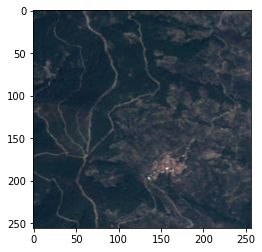

In [6]:
random_index = 70
distances, indices = neighbors.kneighbors([feature_list[random_index]])
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

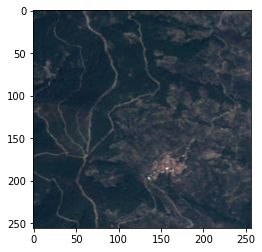

In [7]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]), interpolation='lanczos')

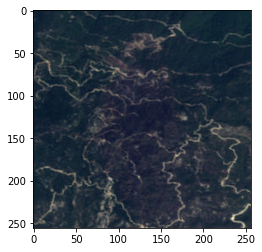

In [8]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

In [9]:
x = [x for x in range(1,1000)]
print(distances[0][x]) 


[0.5428594  0.5618421  0.5620738  0.56658405 0.58002675 0.58592725
 0.5863516  0.58664083 0.5869267  0.5928049  0.59702516 0.5998866
 0.6008527  0.60393685 0.6047366  0.6060263  0.609163   0.60933125
 0.61169946 0.61389714 0.61408705 0.614662   0.61505306 0.6173123
 0.6177876  0.6186639  0.6187579  0.61988735 0.6208137  0.62122756
 0.6212662  0.62128234 0.62140155 0.6217269  0.6218464  0.62293047
 0.62392485 0.6252372  0.6252589  0.6256972  0.62581563 0.62600124
 0.62619543 0.6263384  0.6270158  0.62706286 0.6275468  0.62763083
 0.6301849  0.6310064  0.63174796 0.6325812  0.6326196  0.6330566
 0.6335274  0.63400537 0.6344557  0.63461226 0.63471305 0.63522196
 0.6352488  0.63557565 0.6356881  0.63623375 0.6366606  0.63801485
 0.6384486  0.6389451  0.63915485 0.6393705  0.63982964 0.64038664
 0.64059114 0.64083993 0.6409922  0.64107186 0.6415496  0.64178276
 0.6421669  0.6422946  0.64260477 0.6442274  0.64423716 0.6442945
 0.6443335  0.64462376 0.64492023 0.64523554 0.6453058  0.64601016

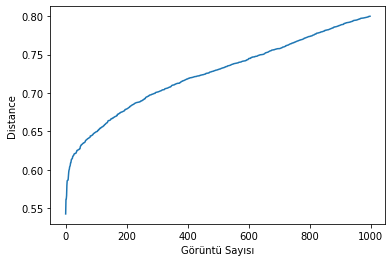

In [10]:
plt.plot(distances[0][x])
plt.ylabel('Distance')
plt.xlabel('Görüntü Sayısı')
plt.show()

In [24]:
import cv2
import glob
for file in glob.glob("/content/besbin/*.jpg"):
  y = (file.split("/")[-1])
  cv_img = cv2.imread(file)

In [21]:
y

In [ ]:
import cv2 as cv
import glob

gor = glob.glob("*.jpg")
for ima in gor:
    im = cv.imread(ima, 1)

In [ ]:
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        a = PImage.open(path + image)
        loadedImages.append(a)

    return loadedImages

path = "/content/besbin/"

# your images in an array
imgs = loadImages(path)

for a in imgs:
    # you can show every image
    a.show()

In [12]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(50, 40))
    columns = 10
    for i, image in enumerate(images):
        ylabel = plt.subplot(len(images) / columns+1 , columns, i + 1)
        
        if i == 0:
            plt.ylabel("Query image\n" + classname_filename(filenames[i]))
        else:
            plt.ylabel("Similar Image\n" + classname_filename(filenames[i]))
                         
            plt.title("\nDistance: " + str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)
        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        #plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)
        # We will use this line repeatedly in our code.

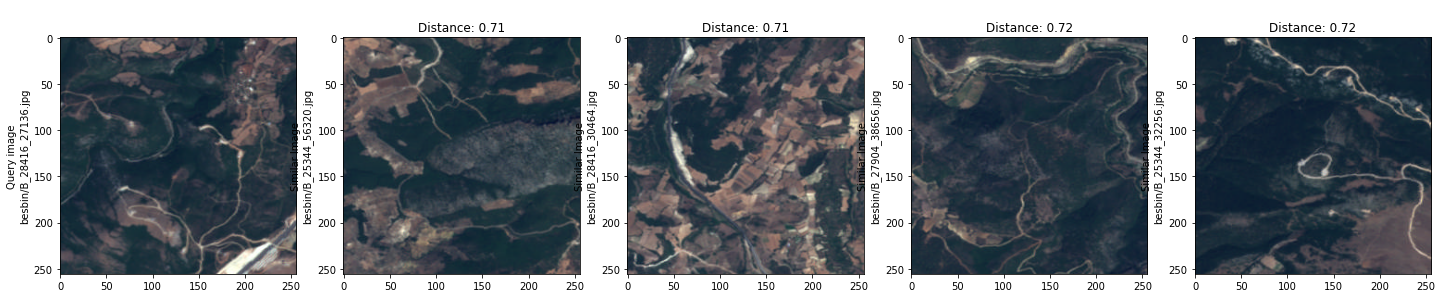

In [27]:
for i in range(1):
  
    random_image_index = random.randint(0, num_images)
    distances, indices = neighbors.kneighbors(
        [feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 5)]
    plot_images(similar_image_paths, distances[0])

In [ ]:
num_feature_dimensions = 100
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=10,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list_compressed)
distances, indices = neighbors.kneighbors([feature_list_compressed[0]])

In [ ]:
for i in range(10):
    random_image_index = random.randint(0, num_images)
    distances, indices = neighbors.kneighbors(
        [feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 10)]
    plot_images(similar_image_paths, distances[0])

ValueError: ignored